In [1]:
# Linear Congruental Method
def LCM(n, r0, multiplier,increment, modulus):
  if n == 1: return r0
  else: 
    return (multiplier*LCM(n-1, r0, multiplier,increment, modulus)+increment)%modulus

n=10
for i in range(1,n+1): 
  print(LCM(i,10,2,0,11))


10
9
7
3
6
1
2
4
8
5


In [3]:
# Periodic Boundary Method
def periodic2(A):
  for i in range(len(A)):
    A[i].insert(len(A),A[i][0])
    A[i].insert(0,A[i][len(A)-1])
  top = [0 for i in range(len(A[0]))]
  bot = [0 for i in range(len(A[0]))]
  for i in range(len(A[0])):
    top[i] = A[len(A)-1][i]
    bot[i] = A[0][i]
  A.insert(len(A),bot)
  A.insert(0,top)
  return A


In [4]:
# Celluler Automata
 
# Assign place, yakni tempat bidang 2D dengan berukuran mxn
m,n = 10,10
place = [[0 for i in range(n)]for j in range(m)]

# Misal sel dengan keadaan hidup bernomor 1 dan keadaan mati bernomor 0
#    Aturan transisi
# 1. Sel Mati dengan tepat 3 tetangga hidup akan menjadi hidup (lahir)
# 2. Sel Hidup dengan 2 atau 3 tetangga yang hidup akan tetap 
#    hidup (bertahan hidup)
# 3. Dalam kasus lain, suatu sel akan mati atau tetap mati (terlalu 
#    padat atau terlalu sepi)

def transisi(condition, place, i, j):
  # Menghitung banyak sel hidup di sekitar sel
  life = 0
  if place[i-1][j] == 1 : life+=1
  if place[i+1][j] == 1 : life+=1
  if place[i][j-1] == 1 : life+=1
  if place[i][j+1] == 1 : life+=1
  if place[i-1][j-1] == 1 : life+=1
  if place[i-1][j+1] == 1 : life+=1
  if place[i+1][j-1] == 1 : life+=1
  if place[i+1][j+1] == 1 : life+=1
  
  # Aturan transisi 1
  if condition == 0:
    if life == 3: place[i][j] = 1
  # Aturan transisi 2 dan 3
  else:
    if life != 2 and life != 3: place[i][j] = 0

# Taruh sel hidup 
place[3][4] = 1
place[4][4] = 1
place[6][4] = 1
place[3][5] = 1
place[2][5] = 1
place[3][3] = 1
place[5][6] = 1


# Print matriks
for i in range(m):
  for j in range(n):
    print(place[i][j], end=" ")
  print()

#  Proses transisi
for i in range(1,m-1):
  for j in range(1,n-1):
    condition = place[i][j]
    transisi(condition,place,i,j)

print()
# Print
for i in range(m):
  for j in range(n):
    print(place[i][j], end=" ")
  print()
  


0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 
0 0 0 1 1 1 0 0 0 0 
0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 1 0 0 0 
0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 
0 0 0 1 0 1 0 0 0 0 
0 0 0 0 1 1 1 0 0 0 
0 0 0 0 1 0 1 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 


3.355988520107013
luas teoritis = 2.35169


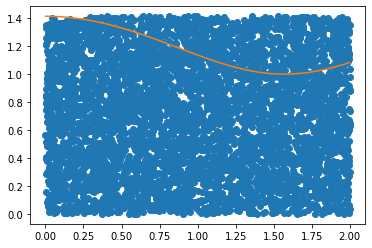

In [5]:
# Menghitug Luas Make Randomness di PPT

from random import uniform
from math import cos
def fungsi(x):
  return ((cos(x))**2+1)**0.5    # 1 <= f(x) <= sqrt2

# Banyak dart
ndart = 5000
dartArray = [[0,0] for i in range(ndart)]

# Memasukkan random dart
for i in range(ndart):
  dartArray[i][0] = uniform(0,2)
  dartArray[i][1] = uniform(0,2**0.5)

# Menghitung banyak dart bawah
n_dart_bawah = 0
for i in range(ndart):
  if dartArray[i][1] < fungsi(dartArray[i][0]):
    n_dart_bawah += 1

# Menghitung luas persegi
luasPersegi = (2-0)*(2**0.5 - 0)

# Menghitung hampiran luas
luas = luasPersegi*ndart/n_dart_bawah
print(luas)
print("luas teoritis = 2.35169")
import matplotlib.pyplot as plt
xdart = [dartArray[i][0] for i in range(ndart)]
ydart = [dartArray[i][1] for i in range(ndart)]
plt.plot(xdart, ydart, "o")

xmin, xmax = 0, 2
Nx = 201
dx = (xmax-xmin)/(Nx-1)
x = [xmin+i*dx for i in range(Nx)]
y = [fungsi(xmin+i*dx) for i in range(Nx)]
plt.plot(x,y)
plt.show()
